In [77]:
import numpy as np
import pandas as pd
from keras.models import load_model
data = pd.read_excel('SK-real-load.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(70963, 46)
(70961, 46)


In [78]:
shape=data.shape
N=shape[0]

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))


for ii in range(0,N):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,7]
    l2 = data.iloc[ii,8]
    l3 = data.iloc[ii,9]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1*0.01
    Ls[ii,1,0]=l2*0.01
    Ls[ii,2,0]=l3*0.01
    
    Y[ii,:] = data.iloc[ii][[10,12,15,18,21,24,27,30,33,36,39,42,45]]


    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



    

In [79]:
l1_min = min(data.iloc[:,7])
l1_max = max(data.iloc[:,7])
l2_min = min(data.iloc[:,8])
l2_max = max(data.iloc[:,8])
l3_min = min(data.iloc[:,9])
l3_max = max(data.iloc[:,9])

for ii in range(0,N):
    Ls[ii,0,0]= (Ls[ii,0,0]-l1_min) / (l1_max-l1_min)
    Ls[ii,1,0]= (Ls[ii,1,0]-l2_min) / (l2_max-l2_min)
    Ls[ii,2,0]= (Ls[ii,2,0]-l3_min) / (l3_max-l3_min)


In [80]:
l3_max

7576.974932

Tensor("dense_25/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_26/BiasAdd:0", shape=(?, 3), dtype=float32)
Train on 70961 samples, validate on 70961 samples
Epoch 1/100
70961/70961 [==============================] - 15s 206us/step - loss: 1.0134e-04 - val_loss: 8.0601e-05
Epoch 2/100
70961/70961 [==============================] - 11s 159us/step - loss: 7.3354e-05 - val_loss: 6.9252e-05
Epoch 3/100
70961/70961 [==============================] - 11s 155us/step - loss: 6.2669e-05 - val_loss: 6.1124e-05
Epoch 4/100
70961/70961 [==============================] - 11s 159us/step - loss: 5.8010e-05 - val_loss: 5.1755e-05
Epoch 5/100
70961/70961 [==============================] - 11s 162us/step - loss: 5.4704e-05 - val_loss: 5.9980e-05
Epoch 6/100
70961/70961 [==============================] - 11s 161us/step - loss: 5.1561e-05 - val_loss: 4.5648e-05
Epoch 7/100
70961/70961 [==============================] - 12s 172us/step - loss: 4.9475e-05 - val_loss: 4.8819e-05
Epoch 8/100
70961/70961 

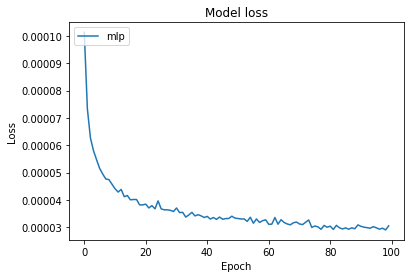

In [81]:
model=load_model('SK_real_model.h5')
'''
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=100, batch_size=32, verbose=1)  

model.save('SK_real_model.h5')
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
'''
print()

[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.] [0.634 0.305 0.342]


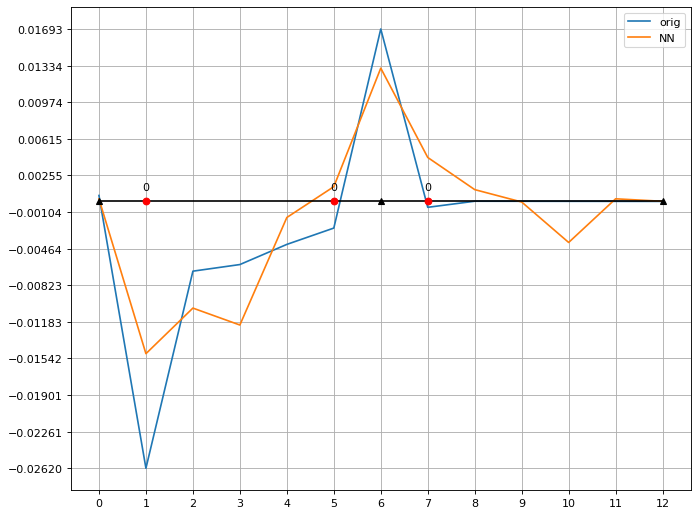

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0.366 0.171 0.208]


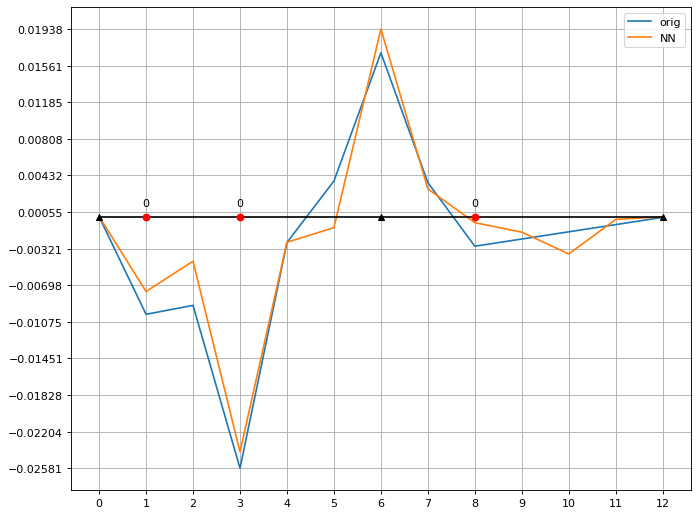

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [0.161 0.2   0.237]


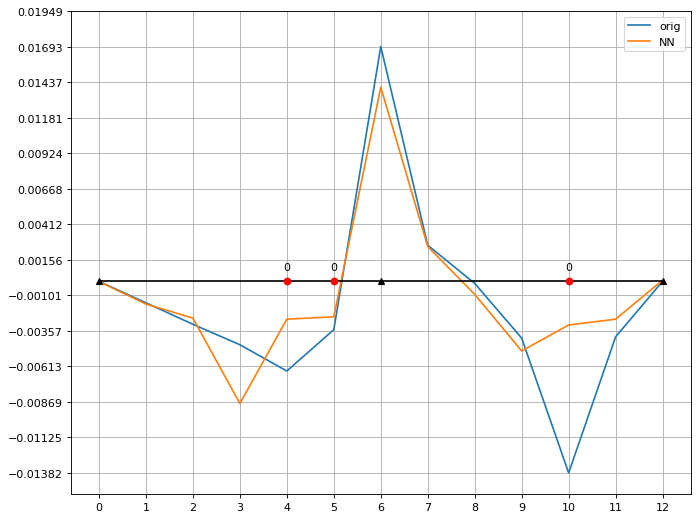

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [0.428 0.202 0.107]


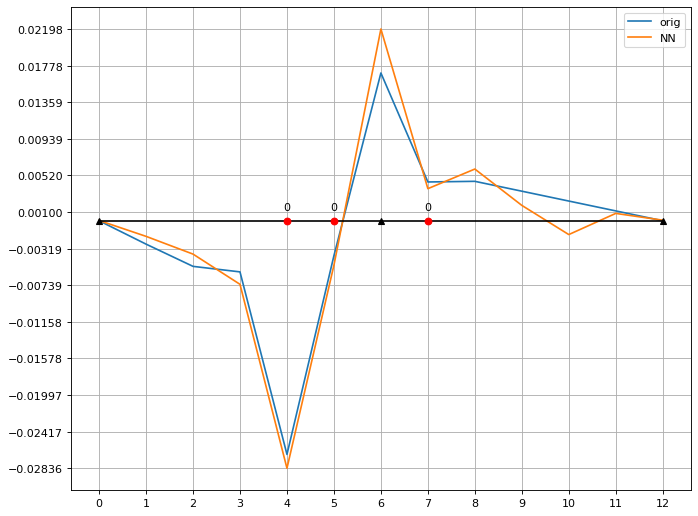

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [0.645 0.124 0.347]


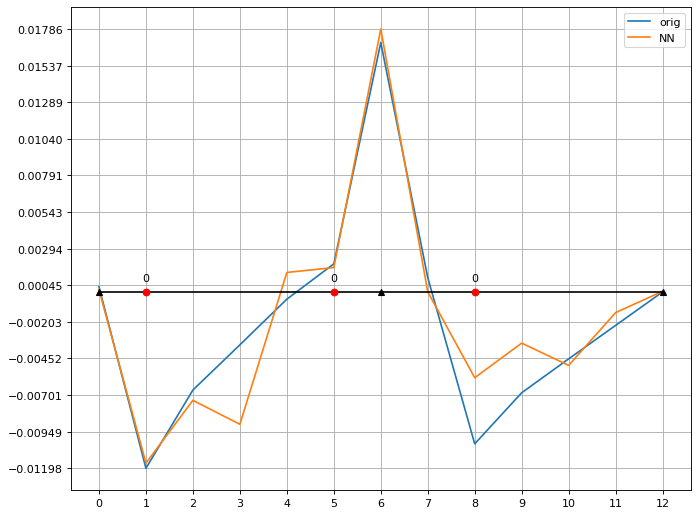

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [0.645 0.124 0.347]


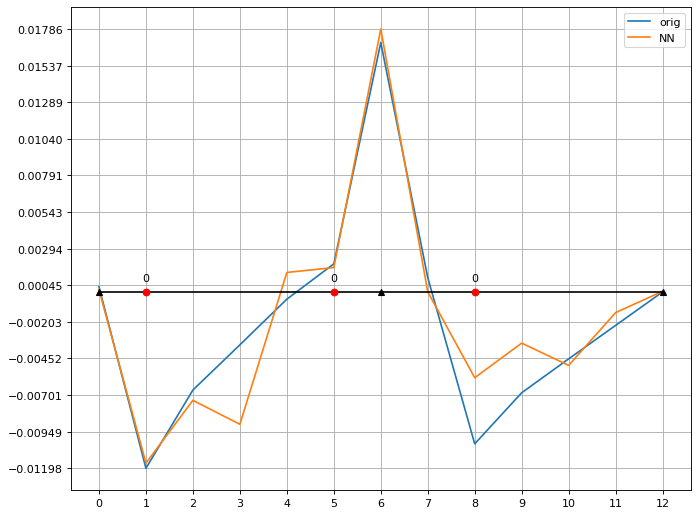

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [0.193 0.231 0.268]


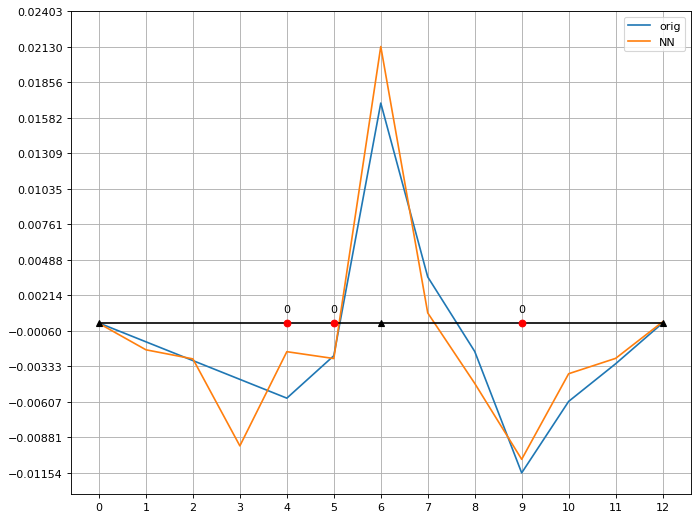

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [0.481 0.083 0.265]


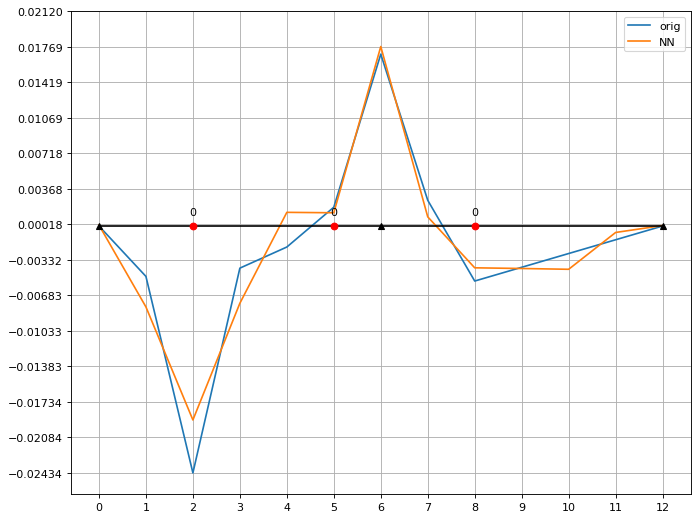

In [35]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


for ii in [47960,47961,47962,47963,47964,47965,47966,47967]:
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0]*100)
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [66]:
shape=data.shape
N=shape[0]
            
X = np.zeros((N*13,7,1))
Y = np.zeros((N*13,1))

loc =[10,12,15,18,21,24,27,30,33,36,39,42,45]

for ii in range(0,N):
    for i in range(13):
        
        q1 = int(data.iloc[ii,0])
        q2 = int(data.iloc[ii,1])
        q3 = int(data.iloc[ii,2])

        l1 = data.iloc[ii,7]
        l2 = data.iloc[ii,8]
        l3 = data.iloc[ii,9]



        X[ii*13+i,0,0] = q1
        X[ii*13+i,1,0] = q2
        X[ii*13+i,2,0] = q3

        X[ii*13+i,3,0]=l1*0.01
        X[ii*13+i,4,0]=l2*0.01
        X[ii*13+i,5,0]=l3*0.01

        X[ii*13+i,6,0]=i

        Y[ii*13+i,0] = data.iloc[ii][loc[i]]
  

        
        

xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]


    

In [67]:
##DIFFERENT NETWORK
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

inputA = krs.Input(shape=(7,))

z = Dense(128, activation="relu")(inputA)
z = Dense(64, activation="relu")(z)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(12, activation="relu")(z)
z = Dense(1, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=inputA, outputs=z)
model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1)) 


history = model.fit( X[:,:,0], Y, validation_data=(X[:,:,0], Y),
                        epochs=100, batch_size=32, verbose=1)  
    

Train on 922493 samples, validate on 922493 samples
Epoch 1/100
922493/922493 [==============================] - 62s 67us/step - loss: 2.8342e-04 - val_loss: 9.7567e-05
Epoch 2/100
922493/922493 [==============================] - 63s 69us/step - loss: 7.7846e-05 - val_loss: 5.5028e-05
Epoch 3/100
922493/922493 [==============================] - 62s 67us/step - loss: 6.2915e-05 - val_loss: 5.5034e-05
Epoch 4/100
922493/922493 [==============================] - 60s 65us/step - loss: 6.2378e-05 - val_loss: 4.6996e-05
Epoch 5/100
922493/922493 [==============================] - 61s 66us/step - loss: 5.4920e-05 - val_loss: 5.3939e-05
Epoch 6/100
922493/922493 [==============================] - 60s 65us/step - loss: 5.0193e-05 - val_loss: 4.1138e-05
Epoch 7/100
922493/922493 [==============================] - 56s 61us/step - loss: 4.7984e-05 - val_loss: 4.5246e-05
Epoch 8/100
922493/922493 [==============================] - 61s 66us/step - loss: 4.7158e-05 - val_loss: 4.2367e-05
Epoch 9/100


922493/922493 [==============================] - 63s 69us/step - loss: 3.0842e-05 - val_loss: 2.6657e-05
Epoch 71/100
922493/922493 [==============================] - 63s 69us/step - loss: 3.1920e-05 - val_loss: 3.0429e-05
Epoch 72/100
922493/922493 [==============================] - 63s 68us/step - loss: 3.1230e-05 - val_loss: 3.1750e-05
Epoch 73/100
922493/922493 [==============================] - 63s 68us/step - loss: 3.0225e-05 - val_loss: 2.8419e-05
Epoch 74/100
922493/922493 [==============================] - 65s 70us/step - loss: 3.0467e-05 - val_loss: 3.4137e-05
Epoch 75/100
922493/922493 [==============================] - 64s 69us/step - loss: 3.0701e-05 - val_loss: 3.2264e-05
Epoch 76/100
922493/922493 [==============================] - 63s 69us/step - loss: 3.0549e-05 - val_loss: 2.6973e-05
Epoch 77/100
922493/922493 [==============================] - 63s 69us/step - loss: 3.1105e-05 - val_loss: 2.6641e-05
Epoch 78/100
922493/922493 [==============================] - 63s 69u

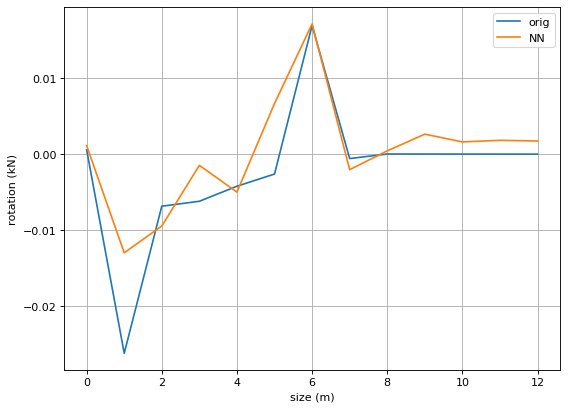

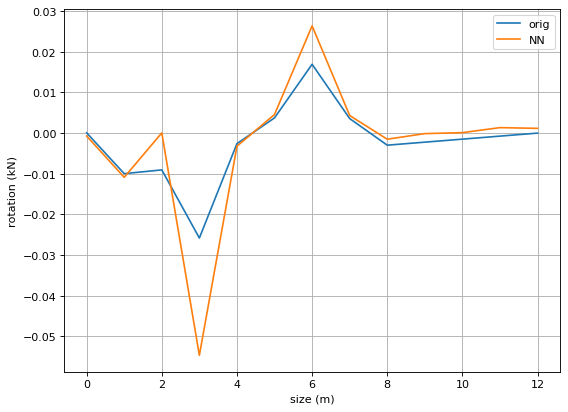

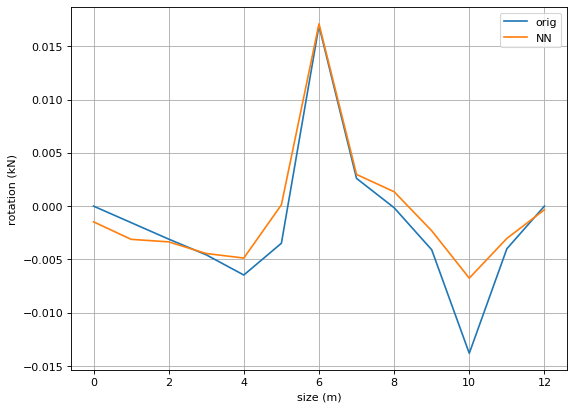

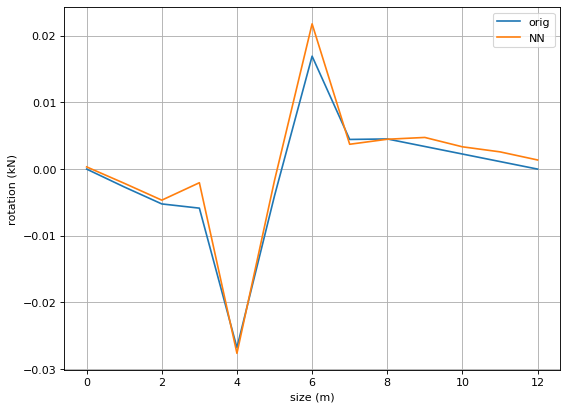

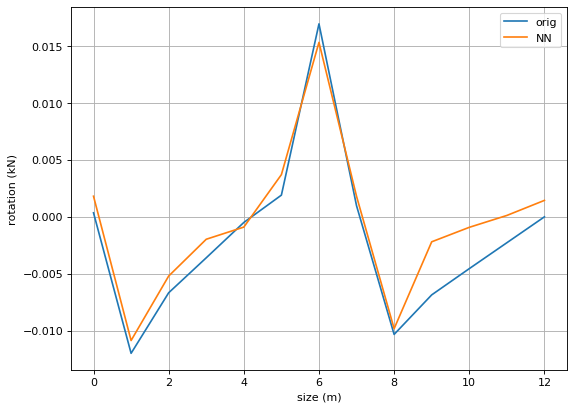

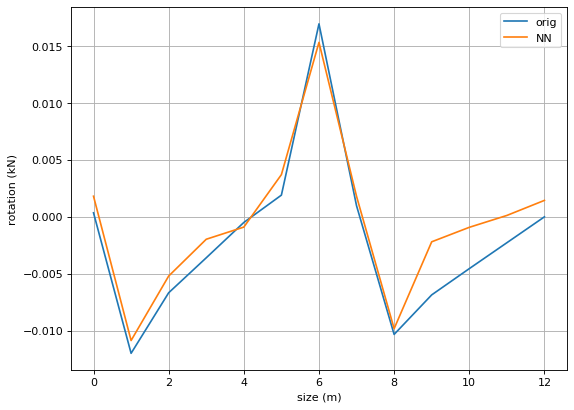

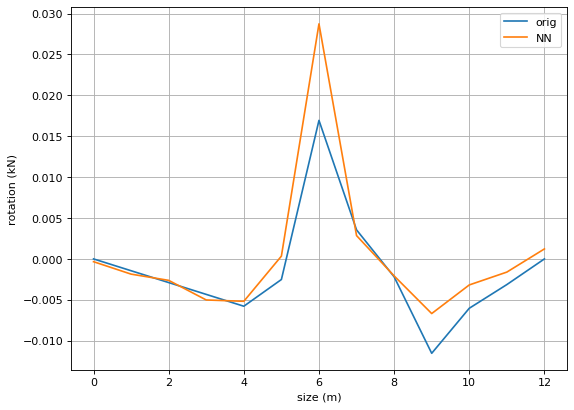

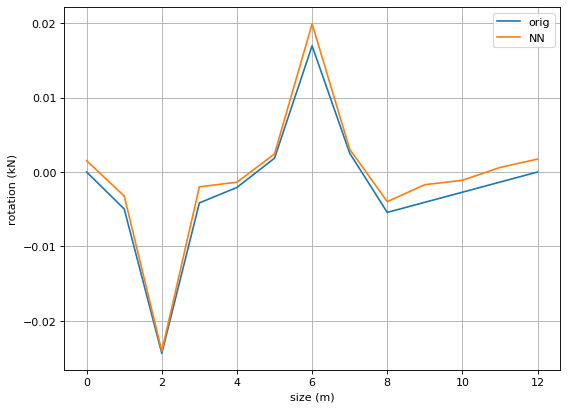

In [71]:
import time
from matplotlib.pyplot import figure



y_pred2 = model.predict([X[:,:,0]])

for ii in[47960,47961,47962,47963,47964,47965,47966,47967]:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    pred=[]
    real=[]
    for i in range(13):
        pred.append(y_pred2[ii*13+i])
        real.append(Y[ii*13+i])
        
    #maximo = max([max(pred),max(real)])
    #minimo = min([min(pred),min(real)])
        

    plt.plot(real,label='orig')
    plt.plot(pred,label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.xlabel('size (m)')
    plt.ylabel('rotation (kN)')
    
   # plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    #plt.plot([0,6,12],[0,0,0],'^k')
    #loads=np.where(X[ii,:,0]==1)[0]
    #plt.plot(loads,[0,0,0],'ro')
    
    '''for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
'''
        
    stepd=(maximo-minimo)/12.0
    #plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    #plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()
    


In [12]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [6.026e-05 2.317e-03 3.592e-03 4.267e-03 3.995e-03 1.872e-03 4.958e-03
 2.413e-03 2.434e-03 4.140e-03 3.810e-03 3.461e-03 8.063e-05]


In [13]:
SK05 =  pd.read_csv('sk_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('sk_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('sk_alpha2_beta2.csv', header=None)

sk05=[]
sk1=[]
sk2=[]

load05=[]
load1=[]
load2=[]
for i in range(0,13):
    load05.append(int(SK05.iloc[i][3]*SK05.iloc[i][6]))
    load1.append(int(SK1.iloc[i][3]*SK1.iloc[i][6]))
    load2.append(int(SK2.iloc[i][3]*SK2.iloc[i][6]))
    
    sk05.append(SK05.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk1.append(SK1.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk2.append(SK2.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    
    


Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    
    Pesos_05[i,0,0] = (load05[i]+30*(i+1)*0.001)*0.01
    Pesos_05[i,1,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5
    Pesos_05[i,2,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5
    Pesos_1[i,0,0] = (load1[i]+30*(i+1)*0.001)*0.01 
    Pesos_1[i,1,0] = (load1[i]+30*(i+1)*0.001)*0.01
    Pesos_1[i,2,0] = (load1[i]+30*(i+1)*0.001)*0.01
    Pesos_2[i,0,0] = (load2[i]+30*(i+1)*0.001)*0.01 
    Pesos_2[i,1,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2
    Pesos_2[i,2,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2 
    
   
    
Inc_SK_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = model.predict([Pos,Pesos_2[:,:,0]])
print(Pesos_05)
print(Pesos_1)
print(Pesos_2)

[[[ 2.85 ]
  [ 1.425]
  [ 1.425]]

 [[ 5.711]
  [ 2.855]
  [ 2.855]]

 [[ 8.561]
  [ 4.28 ]
  [ 4.28 ]]

 [[11.421]
  [ 5.711]
  [ 5.711]]

 [[13.812]
  [ 6.906]
  [ 6.906]]

 [[15.882]
  [ 7.941]
  [ 7.941]]

 [[17.732]
  [ 8.866]
  [ 8.866]]

 [[17.952]
  [ 8.976]
  [ 8.976]]

 [[18.163]
  [ 9.081]
  [ 9.081]]

 [[18.383]
  [ 9.191]
  [ 9.191]]

 [[18.573]
  [ 9.287]
  [ 9.287]]

 [[18.774]
  [ 9.387]
  [ 9.387]]

 [[18.964]
  [ 9.482]
  [ 9.482]]]
[[[ 2.85 ]
  [ 2.85 ]
  [ 2.85 ]]

 [[ 5.711]
  [ 5.711]
  [ 5.711]]

 [[ 8.561]
  [ 8.561]
  [ 8.561]]

 [[11.241]
  [11.241]
  [11.241]]

 [[13.142]
  [13.142]
  [13.142]]

 [[14.902]
  [14.902]
  [14.902]]

 [[15.632]
  [15.632]
  [15.632]]

 [[15.642]
  [15.642]
  [15.642]]

 [[15.643]
  [15.643]
  [15.643]]

 [[15.643]
  [15.643]
  [15.643]]

 [[15.643]
  [15.643]
  [15.643]]

 [[15.644]
  [15.644]
  [15.644]]

 [[15.644]
  [15.644]
  [15.644]]]
[[[ 2.85 ]
  [ 5.701]
  [ 5.701]]

 [[ 5.711]
  [11.421]
  [11.421]]

 [[ 8.251]
  [16.502

In [14]:

import math
def soma(a):
    print(a)
    out=0
    for i in a:
        if i!= math.inf:
            out+=i
        
    return out
    

def make_graph(_xx,_var,sk,_load,_title):
 
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(_load[i])+'N-Rede') 
        plt.plot(_xx,sk[i],'b',label=str(_load[i])+'N-Original')

    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    

    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    

    print(soma(np.abs((_var[0][1:12]-sk[0][1:12])/sk[0][1:12]*100))/11)

            
    
    


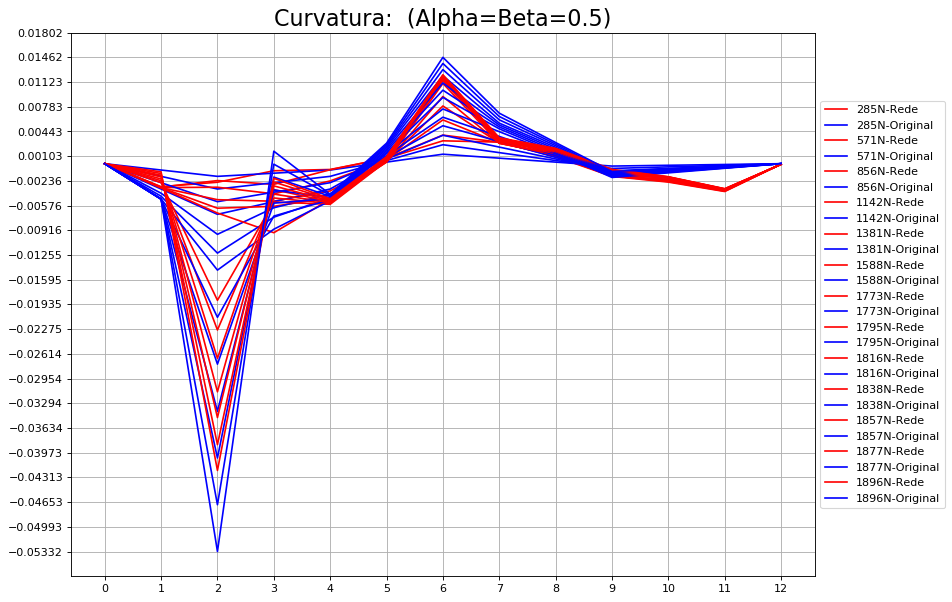

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	71.48%
2 metros 	27.35%
3 metros 	351.01%
4 metros 	15.03%
5 metros 	87.57%
6 metros 	39.26%
7 metros 	64.51%
8 metros 	59.19%
9 metros 	75.12%
10 metros 	232.89%
11 metros 	1036.83%
12 metros 	inf%
10    263.508
13    46.4896
16    25.6882
19    8.67053
22    242.539
25    141.141
28    289.941
31    337.513
34    435.641
37    1063.01
40    3410.63
Name: 0, dtype: object
569.5247724031075


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [15]:
make_graph(xticks,Inc_SK_05,sk05,load05, 'Curvatura:  (Alpha=Beta=0.5)')


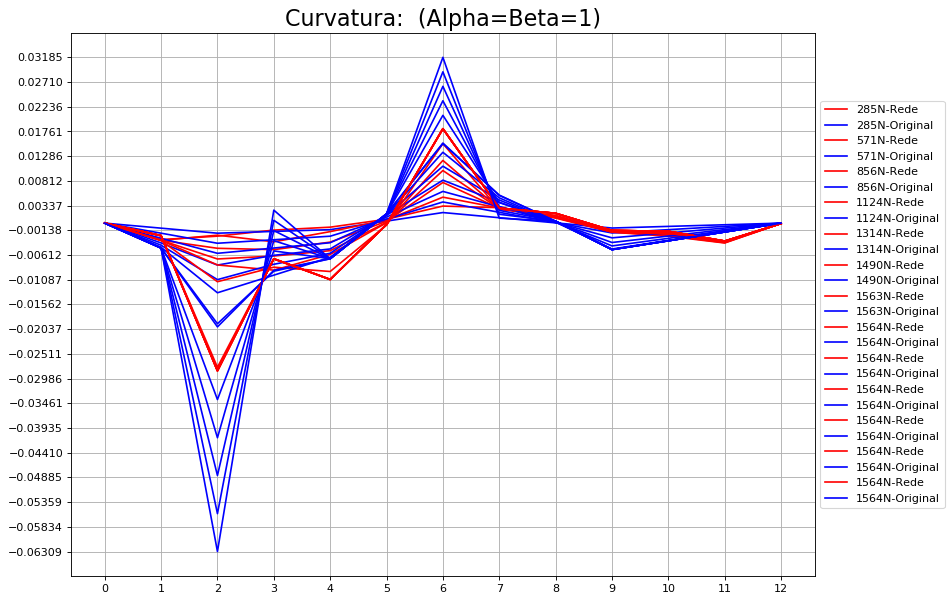

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	60.14%
2 metros 	35.08%
3 metros 	197.35%
4 metros 	44.77%
5 metros 	107.95%
6 metros 	28.35%
7 metros 	63.99%
8 metros 	705.96%
9 metros 	68.53%
10 metros 	73.36%
11 metros 	257.04%
12 metros 	inf%
10    228.149
13    29.4135
16    16.0821
19    38.2179
22    92.5589
25    61.2446
28    185.293
31    1875.39
34    84.0856
37    300.969
40    1114.36
Name: 0, dtype: object
365.9781088194259


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [16]:
make_graph(xticks,Inc_SK_1,sk1,load1,'Curvatura:  (Alpha=Beta=1)')

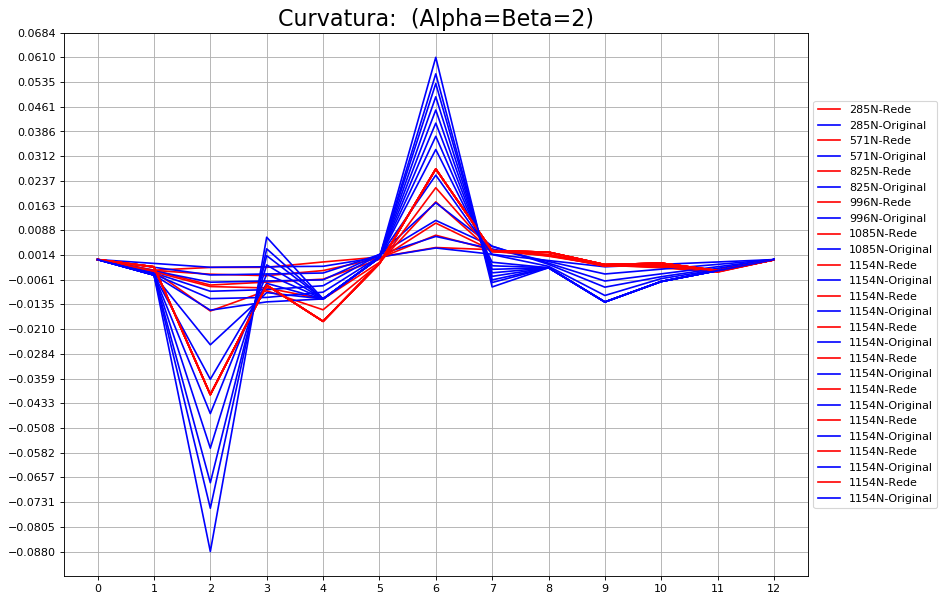

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	56.19%
2 metros 	40.27%
3 metros 	156.83%
4 metros 	53.8%
5 metros 	255.72%
6 metros 	29.11%
7 metros 	151.5%
8 metros 	239.42%
9 metros 	84.89%
10 metros 	79.55%
11 metros 	58.52%
12 metros 	inf%
10    175.615
13     2.2847
16     7.7843
19    64.2734
22    3.54975
25    4.13161
28     85.718
31    450.524
34    22.1184
37    71.1567
40    423.113
Name: 0, dtype: object
119.1154631936206


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [17]:
make_graph(xticks,Inc_SK_2,sk2,load2,'Curvatura:  (Alpha=Beta=2)')

[]

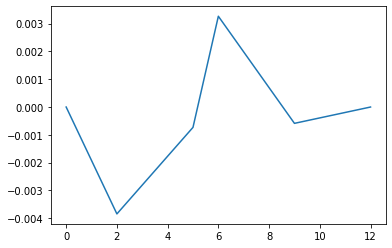

In [18]:
plt.plot(xticks,Y[9851,:])
plt.plot()

In [19]:
sk05[5]

8    -1.16415e-10
10    -0.00447063
13     -0.0122923
16    -0.00735308
19    -0.00469897
22      0.0013899
25     0.00752636
28     0.00440364
31     0.00135404
34    -0.00170832
37    -0.00113888
40   -0.000569441
43   -1.45519e-11
Name: 5, dtype: object

In [22]:
condition=data.iloc[np.where(data.iloc[:]['P1']==1)]
condition=condition.iloc[np.where(condition.iloc[:]['P2']==5)]
condition=condition.iloc[np.where(condition.iloc[:]['P3']==7)]
condition=condition.iloc[np.where(condition.iloc[:]['L1']==condition.iloc[:]['L2'])]
condition=condition.iloc[np.where(condition.iloc[:]['L1']==condition.iloc[:]['L3'])]

condition

,P1,P2,P3,L1,L2,L3,LPF,L1_real,L2_real,L3_real,...,r26,r27,r28,r29,r30,r31,r32,r33,r34,r35
605,1.0,5.0,7.0,5.0,5.0,5.0,9.517813,47.594064,47.594064,47.594064,...,3.100000e-07,3.100000e-07,2.580000e-07,2.070000e-07,2.070000e-07,1.550000e-07,1.030000e-07,1.030000e-07,5.160000e-08,7.110000e-15
1293,1.0,5.0,7.0,10.0,10.0,10.0,9.517813,95.188127,95.188127,95.188127,...,6.200000e-07,6.200000e-07,5.160000e-07,4.130000e-07,4.130000e-07,3.100000e-07,2.070000e-07,2.070000e-07,1.030000e-07,1.420000e-14
1412,1.0,5.0,7.0,11.0,11.0,11.0,9.517813,104.706940,104.706940,104.706940,...,6.810000e-07,6.810000e-07,5.680000e-07,4.540000e-07,4.540000e-07,3.410000e-07,2.270000e-07,2.270000e-07,1.140000e-07,7.110000e-15
2188,1.0,5.0,7.0,17.0,17.0,17.0,9.517813,161.819816,161.819816,161.819816,...,1.050000e-06,1.050000e-06,8.780000e-07,7.020000e-07,7.020000e-07,5.270000e-07,3.510000e-07,3.510000e-07,1.760000e-07,0.000000e+00
3412,1.0,5.0,7.0,26.0,26.0,26.0,9.517813,247.489131,247.489131,247.489131,...,1.610000e-06,1.610000e-06,1.340000e-06,1.070000e-06,1.070000e-06,8.050000e-07,5.370000e-07,5.370000e-07,2.680000e-07,1.420000e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47942,1.0,5.0,7.0,395.0,395.0,395.0,7.040742,2781.488059,2781.488059,2781.488059,...,9.910000e-06,9.910000e-06,8.260000e-06,6.610000e-06,6.610000e-06,4.950000e-06,3.300000e-06,3.300000e-06,1.650000e-06,5.680000e-14
47964,1.0,5.0,7.0,396.0,396.0,396.0,7.023777,2781.811695,2781.811695,2781.811695,...,1.280000e-05,1.280000e-05,1.070000e-05,8.550000e-06,8.550000e-06,6.410000e-06,4.270000e-06,4.270000e-06,2.140000e-06,1.140000e-13
47965,1.0,5.0,7.0,396.0,396.0,396.0,7.023777,2781.811695,2781.811695,2781.811695,...,1.280000e-05,1.280000e-05,1.070000e-05,8.550000e-06,8.550000e-06,6.410000e-06,4.270000e-06,4.270000e-06,2.140000e-06,1.140000e-13
47999,1.0,5.0,7.0,398.0,398.0,398.0,6.989864,2782.364011,2782.364011,2782.364011,...,1.780000e-05,1.780000e-05,1.480000e-05,1.190000e-05,1.190000e-05,8.900000e-06,5.930000e-06,5.930000e-06,2.970000e-06,1.140000e-13


In [ ]:
plt.plot(xticks,Y[39978,:],label='orig')
plt.plot(xticks,y_pred1[39978,:],label='NN')
plt.plot(xticks,sk05[12],label='real')
plt.legend()
plt.show()
    
